# PokeGAN


In [1]:
!rm -r logs/*

In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
# Convert PNG to JPG
import os
from utils import convert_to_png

if not os.path.exists(os.path.join('data', 'pokemon_jpg')):
    convert_to_png(os.path.join('tmp', 'pokemon'), os.path.join('data', 'pokemon_jpg'))

In [4]:
from preprocessing import get_dataloader

In [5]:
# DataLoader parameters
batch_size = 64
min_scale, max_scale = 16, 64

In [6]:
poke_loader = get_dataloader(batch_size, max_scale, data_dir='data')

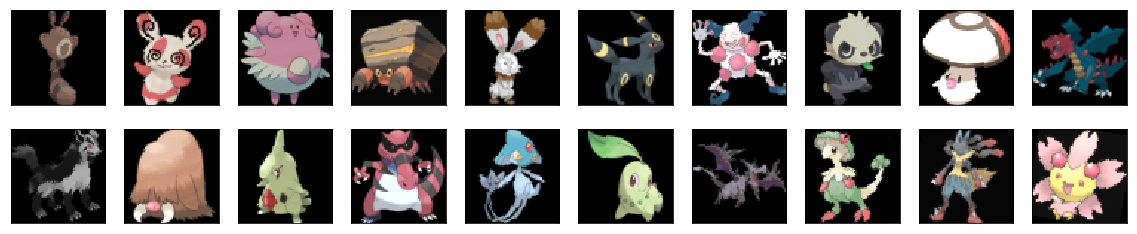

In [7]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# obtain one batch of training images
dataiter = iter(poke_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [8]:
import torch.nn as nn

In [9]:
# Model hyperparameters
z_size = 100
latent_feature_size = 4

d_conv_dim = 32
d_ksize = 3
d_stride = 2
g_conv_dim = 32
g_ksize = 5
g_stride = 2
use_dropout = True
norm_block = nn.BatchNorm2d
# norm_block = nn.InstanceNorm2d
# norm_block = nn.LocalResponseNorm

In [10]:
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


In [11]:
from torch.utils.tensorboard import SummaryWriter
logger = SummaryWriter("logs")

In [12]:
import torch.optim as optim

# Training hyperparameters
criterion = nn.BCEWithLogitsLoss()
cycles = [dict(lr=1e-3, nb_epochs=200),
          dict(lr=5e-4, nb_epochs=800),
          dict(lr=2e-4, nb_epochs=4000)]
cycles = [dict(lr=1e-3, nb_epochs=200),
          dict(lr=5e-4, nb_epochs=800)]
beta1 = 0.5
beta2 = 0.999
nb_stages = int(np.log2(max_scale / min_scale)) + 1
img_size = min_scale

In [13]:
from models import Discriminator, Generator
from train import train_GAN
from optim import get_noise, normal_initialization

In [14]:
sample_size = 16
fixed_z = get_noise((sample_size, z_size))

Stage 16x16 (1/3)
Cycle (1/2) - {'lr': 0.001, 'nb_epochs': 200}
Epoch [   10/  200] | d_loss: 0.5724 | g_loss: 1.9411
Epoch [   20/  200] | d_loss: 1.1933 | g_loss: 2.3542
Epoch [   30/  200] | d_loss: 0.8588 | g_loss: 1.8020
Epoch [   40/  200] | d_loss: 1.3502 | g_loss: 0.9559
Epoch [   50/  200] | d_loss: 1.3075 | g_loss: 1.0232
Epoch [   60/  200] | d_loss: 1.3580 | g_loss: 0.7682
Epoch [   70/  200] | d_loss: 1.2673 | g_loss: 0.7294
Epoch [   80/  200] | d_loss: 1.2992 | g_loss: 0.7916
Epoch [   90/  200] | d_loss: 1.3285 | g_loss: 0.8199
Epoch [  100/  200] | d_loss: 1.4189 | g_loss: 0.8066


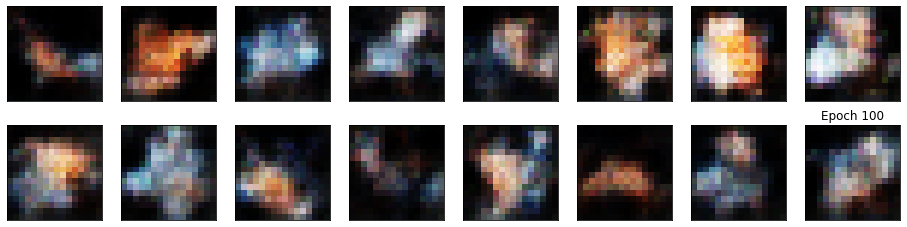

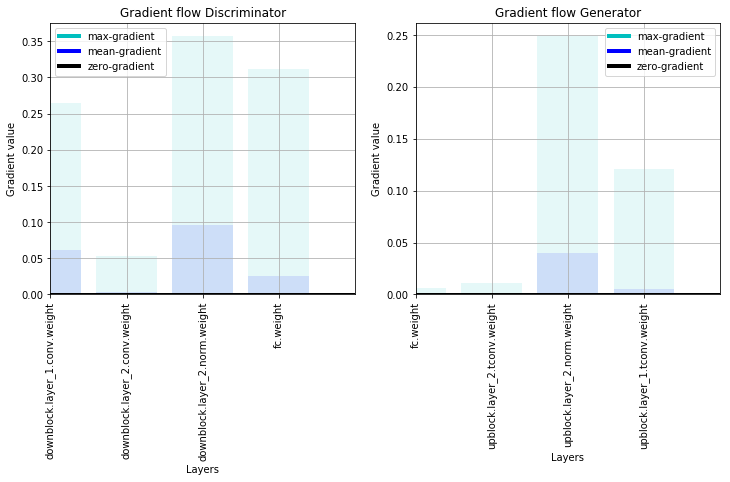

Epoch [  110/  200] | d_loss: 1.3636 | g_loss: 0.8072
Epoch [  120/  200] | d_loss: 1.3348 | g_loss: 0.6546
Epoch [  130/  200] | d_loss: 1.3363 | g_loss: 0.7721
Epoch [  140/  200] | d_loss: 1.3441 | g_loss: 0.7251
Epoch [  150/  200] | d_loss: 1.2938 | g_loss: 0.7298
Epoch [  160/  200] | d_loss: 1.3335 | g_loss: 0.7476
Epoch [  170/  200] | d_loss: 1.2927 | g_loss: 0.6400
Epoch [  180/  200] | d_loss: 1.4368 | g_loss: 0.6021
Epoch [  190/  200] | d_loss: 1.3490 | g_loss: 0.6970
Epoch [  200/  200] | d_loss: 1.3508 | g_loss: 0.6511


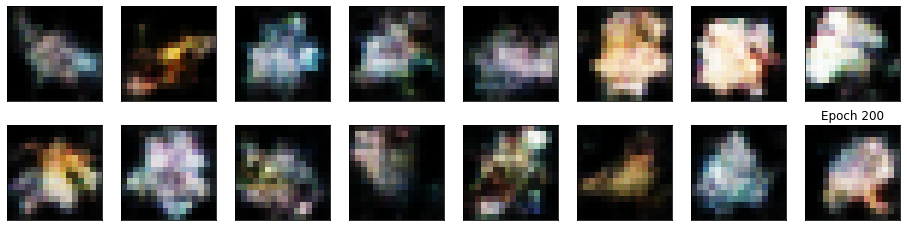

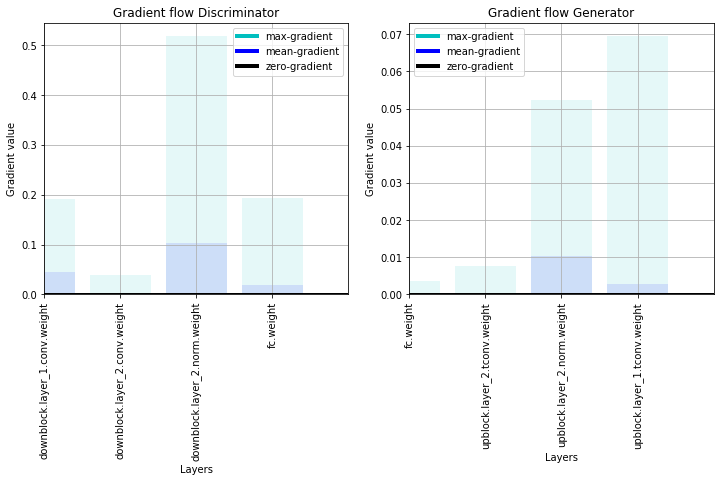

Cycle (2/2) - {'lr': 0.0005, 'nb_epochs': 800}
Epoch [   10/  800] | d_loss: 1.3485 | g_loss: 0.7103
Epoch [   20/  800] | d_loss: 1.4061 | g_loss: 0.7269
Epoch [   30/  800] | d_loss: 1.3075 | g_loss: 0.6108
Epoch [   40/  800] | d_loss: 1.4028 | g_loss: 0.6359
Epoch [   50/  800] | d_loss: 1.3471 | g_loss: 0.6736
Epoch [   60/  800] | d_loss: 1.3708 | g_loss: 0.6726
Epoch [   70/  800] | d_loss: 1.3472 | g_loss: 0.6178
Epoch [   80/  800] | d_loss: 1.3730 | g_loss: 0.5485
Epoch [   90/  800] | d_loss: 1.4194 | g_loss: 0.6449
Epoch [  100/  800] | d_loss: 1.3821 | g_loss: 0.6810


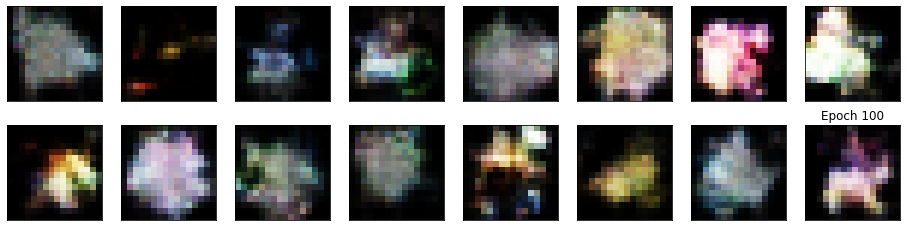

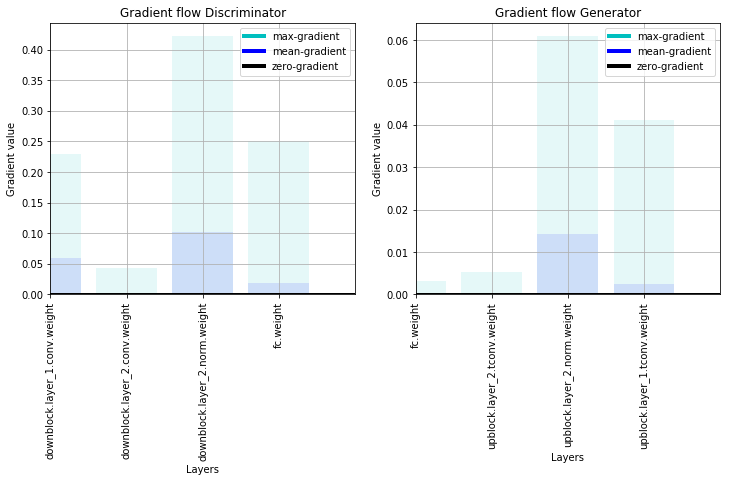

Epoch [  110/  800] | d_loss: 1.3834 | g_loss: 0.6545
Epoch [  120/  800] | d_loss: 1.3312 | g_loss: 0.6557
Epoch [  130/  800] | d_loss: 1.4013 | g_loss: 0.6718
Epoch [  140/  800] | d_loss: 1.3741 | g_loss: 0.6681
Epoch [  150/  800] | d_loss: 1.3422 | g_loss: 0.5979
Epoch [  160/  800] | d_loss: 1.3821 | g_loss: 0.6588
Epoch [  170/  800] | d_loss: 1.3306 | g_loss: 0.6320
Epoch [  180/  800] | d_loss: 1.3236 | g_loss: 0.5986
Epoch [  190/  800] | d_loss: 1.3284 | g_loss: 0.6774
Epoch [  200/  800] | d_loss: 1.3640 | g_loss: 0.6542


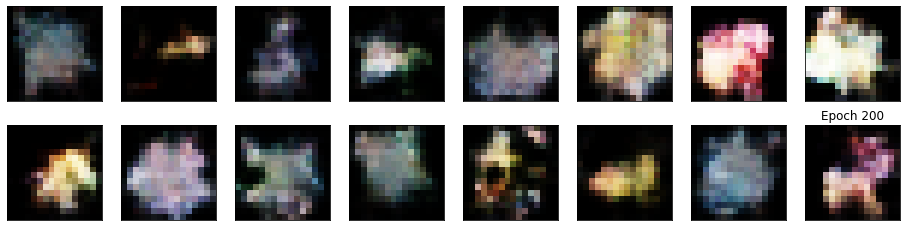

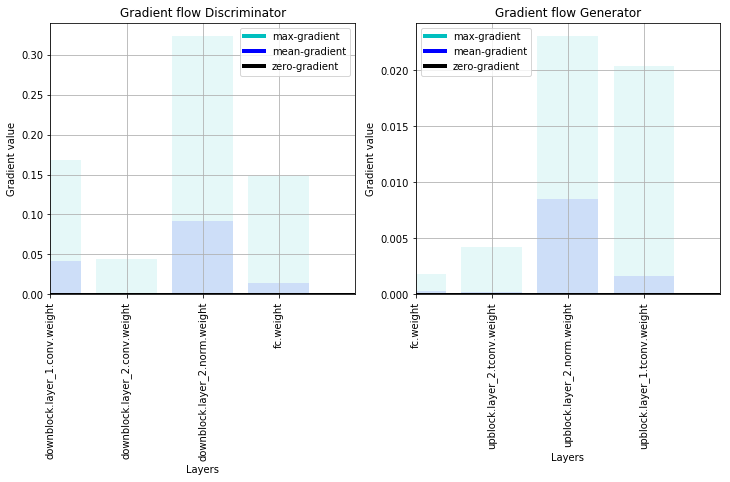

Epoch [  210/  800] | d_loss: 1.3763 | g_loss: 0.6591
Epoch [  220/  800] | d_loss: 1.3693 | g_loss: 0.6475
Epoch [  230/  800] | d_loss: 1.3603 | g_loss: 0.6147
Epoch [  240/  800] | d_loss: 1.3715 | g_loss: 0.5923
Epoch [  250/  800] | d_loss: 1.3430 | g_loss: 0.6282
Epoch [  260/  800] | d_loss: 1.3491 | g_loss: 0.6188
Epoch [  270/  800] | d_loss: 1.3593 | g_loss: 0.6346
Epoch [  280/  800] | d_loss: 1.3909 | g_loss: 0.6633
Epoch [  290/  800] | d_loss: 1.3723 | g_loss: 0.6470
Epoch [  300/  800] | d_loss: 1.3744 | g_loss: 0.6184


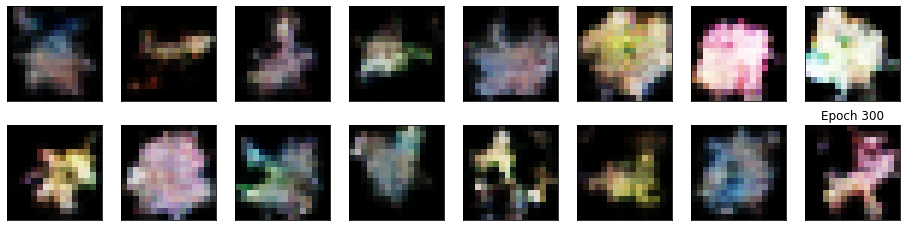

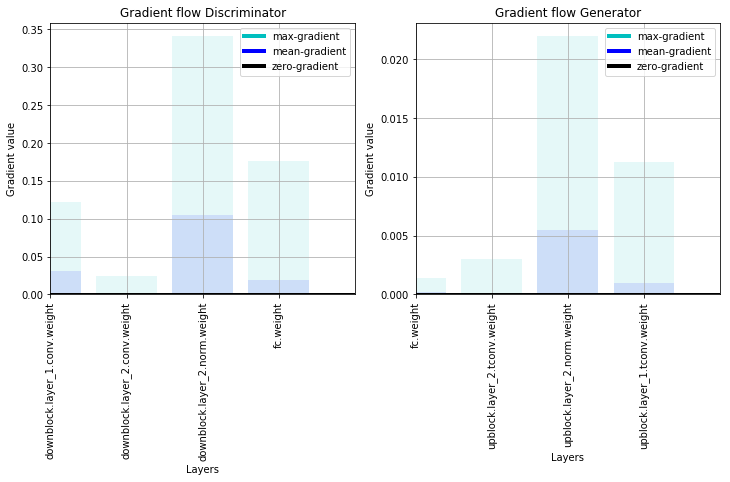

Epoch [  310/  800] | d_loss: 1.3567 | g_loss: 0.5748
Epoch [  320/  800] | d_loss: 1.3603 | g_loss: 0.6075
Epoch [  330/  800] | d_loss: 1.3230 | g_loss: 0.5409
Epoch [  340/  800] | d_loss: 1.3679 | g_loss: 0.5838
Epoch [  350/  800] | d_loss: 1.3992 | g_loss: 0.5489
Epoch [  360/  800] | d_loss: 1.3395 | g_loss: 0.6111
Epoch [  370/  800] | d_loss: 1.3748 | g_loss: 0.6163
Epoch [  380/  800] | d_loss: 1.3957 | g_loss: 0.6487
Epoch [  390/  800] | d_loss: 1.3986 | g_loss: 0.6391
Epoch [  400/  800] | d_loss: 1.3559 | g_loss: 0.6325


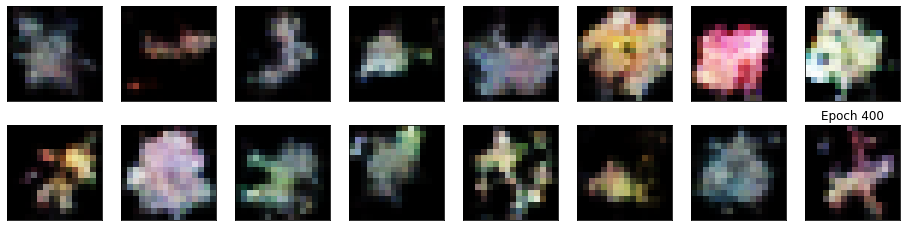

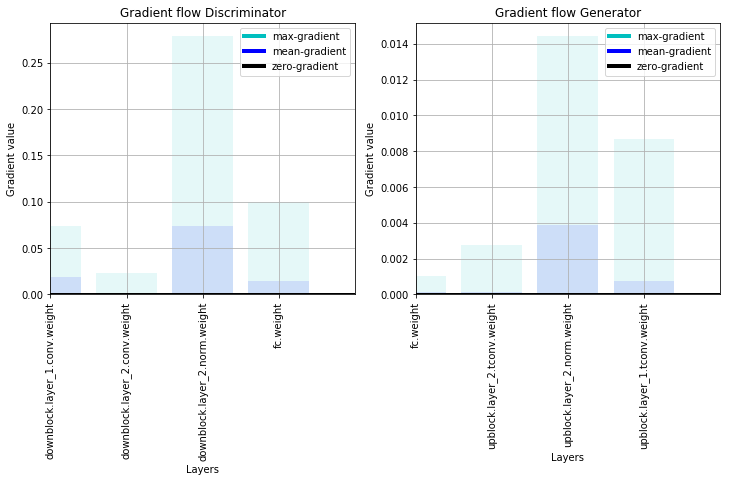

Epoch [  410/  800] | d_loss: 1.4024 | g_loss: 0.6345
Epoch [  420/  800] | d_loss: 1.4370 | g_loss: 0.6275
Epoch [  430/  800] | d_loss: 1.3924 | g_loss: 0.6334
Epoch [  440/  800] | d_loss: 1.4159 | g_loss: 0.6225
Epoch [  450/  800] | d_loss: 1.3992 | g_loss: 0.6042
Epoch [  460/  800] | d_loss: 1.3775 | g_loss: 0.5992
Epoch [  470/  800] | d_loss: 1.3665 | g_loss: 0.6043
Epoch [  480/  800] | d_loss: 1.4173 | g_loss: 0.6054
Epoch [  490/  800] | d_loss: 1.3912 | g_loss: 0.6140
Epoch [  500/  800] | d_loss: 1.4073 | g_loss: 0.5997


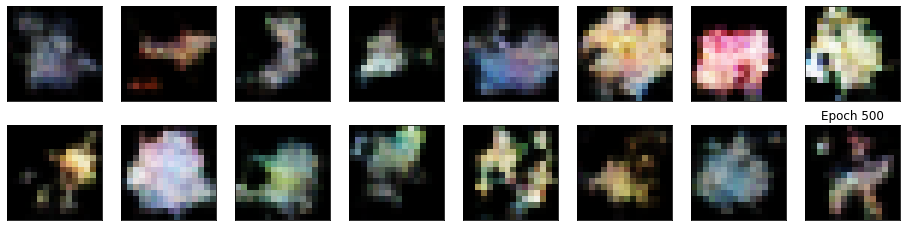

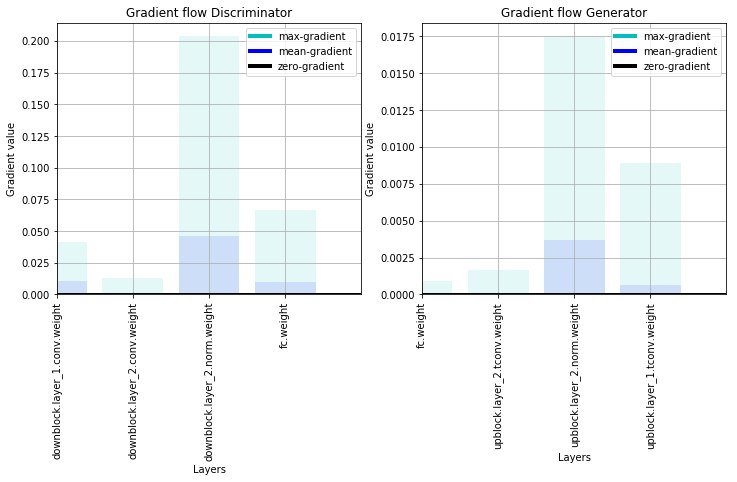

Epoch [  510/  800] | d_loss: 1.3608 | g_loss: 0.5976
Epoch [  520/  800] | d_loss: 1.3906 | g_loss: 0.6108
Epoch [  530/  800] | d_loss: 1.4292 | g_loss: 0.5921
Epoch [  540/  800] | d_loss: 1.4108 | g_loss: 0.6459
Epoch [  550/  800] | d_loss: 1.3952 | g_loss: 0.6260
Epoch [  560/  800] | d_loss: 1.3921 | g_loss: 0.6427
Epoch [  570/  800] | d_loss: 1.3707 | g_loss: 0.6356
Epoch [  580/  800] | d_loss: 1.4004 | g_loss: 0.6295
Epoch [  590/  800] | d_loss: 1.3608 | g_loss: 0.6032
Epoch [  600/  800] | d_loss: 1.3653 | g_loss: 0.6010


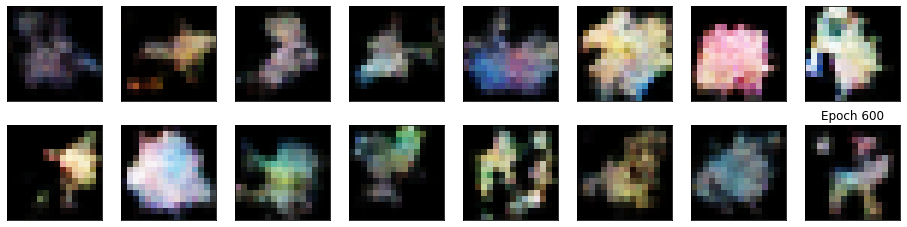

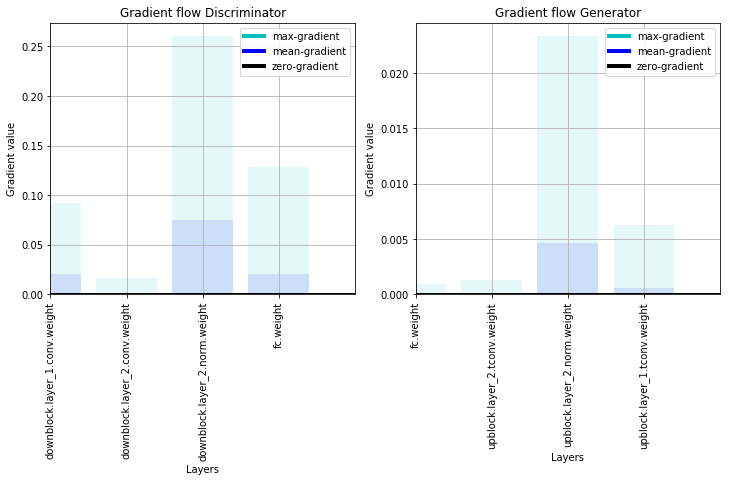

Epoch [  610/  800] | d_loss: 1.4112 | g_loss: 0.5950
Epoch [  620/  800] | d_loss: 1.3508 | g_loss: 0.5610
Epoch [  630/  800] | d_loss: 1.3962 | g_loss: 0.5989
Epoch [  640/  800] | d_loss: 1.3805 | g_loss: 0.6064
Epoch [  650/  800] | d_loss: 1.3337 | g_loss: 0.5855
Epoch [  660/  800] | d_loss: 1.3713 | g_loss: 0.5666
Epoch [  670/  800] | d_loss: 1.3742 | g_loss: 0.6019
Epoch [  680/  800] | d_loss: 1.4061 | g_loss: 0.5829
Epoch [  690/  800] | d_loss: 1.4113 | g_loss: 0.6141
Epoch [  700/  800] | d_loss: 1.4197 | g_loss: 0.6282


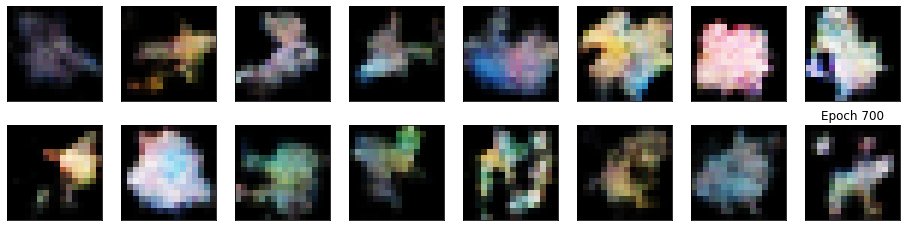

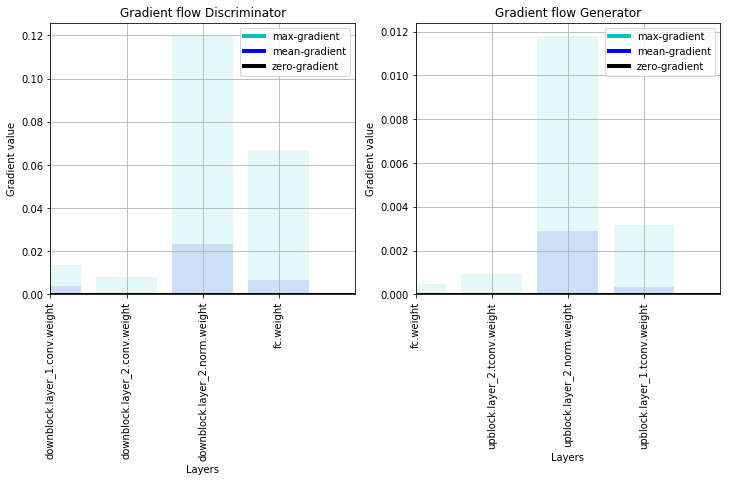

Epoch [  710/  800] | d_loss: 1.3825 | g_loss: 0.6342
Epoch [  720/  800] | d_loss: 1.3685 | g_loss: 0.5826
Epoch [  730/  800] | d_loss: 1.3969 | g_loss: 0.5946
Epoch [  740/  800] | d_loss: 1.3659 | g_loss: 0.6096
Epoch [  750/  800] | d_loss: 1.3761 | g_loss: 0.5955
Epoch [  760/  800] | d_loss: 1.3206 | g_loss: 0.6019
Epoch [  770/  800] | d_loss: 1.3712 | g_loss: 0.5920
Epoch [  780/  800] | d_loss: 1.3139 | g_loss: 0.5493
Epoch [  790/  800] | d_loss: 1.3815 | g_loss: 0.6305
Epoch [  800/  800] | d_loss: 1.3852 | g_loss: 0.6392


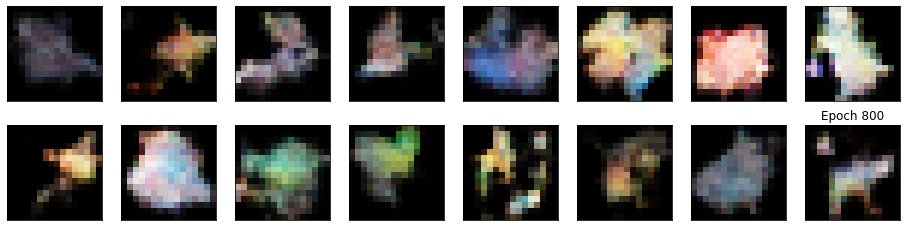

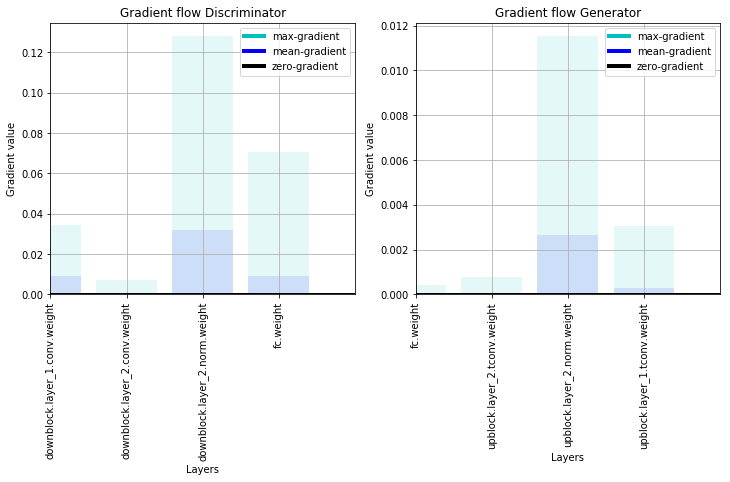

Stage 32x32 (2/3)
Cycle (1/2) - {'lr': 0.001, 'nb_epochs': 200}
Epoch [   10/  200] | d_loss: 1.5173 | g_loss: 2.9175
Epoch [   20/  200] | d_loss: 1.8235 | g_loss: 2.1491
Epoch [   30/  200] | d_loss: 1.7143 | g_loss: 1.5480
Epoch [   40/  200] | d_loss: 1.2414 | g_loss: 0.9635
Epoch [   50/  200] | d_loss: 1.3675 | g_loss: 1.2035
Epoch [   60/  200] | d_loss: 1.4933 | g_loss: 0.8754
Epoch [   70/  200] | d_loss: 1.5931 | g_loss: 1.1118
Epoch [   80/  200] | d_loss: 1.4705 | g_loss: 0.9209
Epoch [   90/  200] | d_loss: 1.1798 | g_loss: 0.6635
Epoch [  100/  200] | d_loss: 1.2497 | g_loss: 0.6447


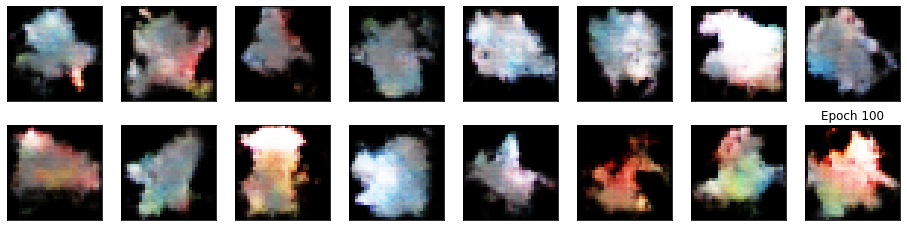

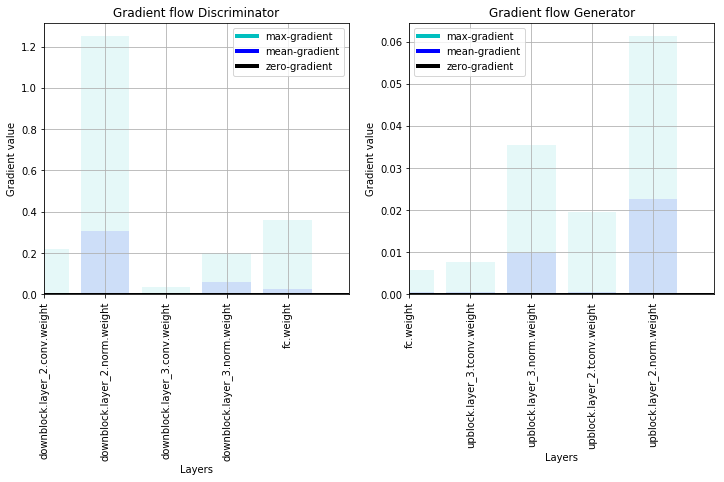

Epoch [  110/  200] | d_loss: 1.3345 | g_loss: 0.8407
Epoch [  120/  200] | d_loss: 1.3552 | g_loss: 0.7618
Epoch [  130/  200] | d_loss: 1.3202 | g_loss: 0.6347
Epoch [  140/  200] | d_loss: 1.3272 | g_loss: 0.8101
Epoch [  150/  200] | d_loss: 1.3645 | g_loss: 0.6216
Epoch [  160/  200] | d_loss: 1.3270 | g_loss: 0.6619
Epoch [  170/  200] | d_loss: 1.2497 | g_loss: 0.6443
Epoch [  180/  200] | d_loss: 1.3394 | g_loss: 0.7352
Epoch [  190/  200] | d_loss: 1.2830 | g_loss: 0.7527
Epoch [  200/  200] | d_loss: 1.3187 | g_loss: 0.7340


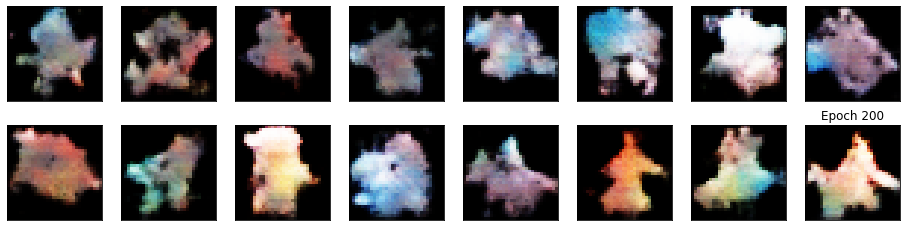

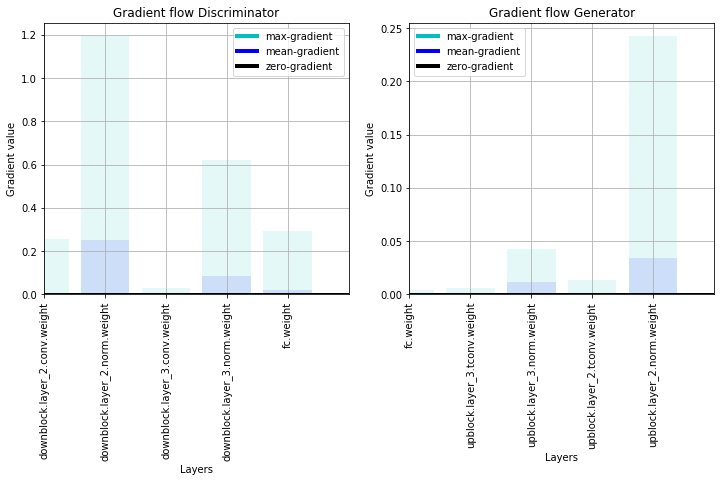

Cycle (2/2) - {'lr': 0.0005, 'nb_epochs': 800}
Epoch [   10/  800] | d_loss: 1.3876 | g_loss: 0.6693
Epoch [   20/  800] | d_loss: 1.5613 | g_loss: 0.7488
Epoch [   30/  800] | d_loss: 1.3821 | g_loss: 0.7457
Epoch [   40/  800] | d_loss: 1.3003 | g_loss: 0.6693
Epoch [   50/  800] | d_loss: 1.2684 | g_loss: 0.6162
Epoch [   60/  800] | d_loss: 1.3502 | g_loss: 0.6529
Epoch [   70/  800] | d_loss: 1.2394 | g_loss: 0.7044
Epoch [   80/  800] | d_loss: 1.2177 | g_loss: 0.6264
Epoch [   90/  800] | d_loss: 1.3345 | g_loss: 0.7759
Epoch [  100/  800] | d_loss: 1.3071 | g_loss: 0.6984


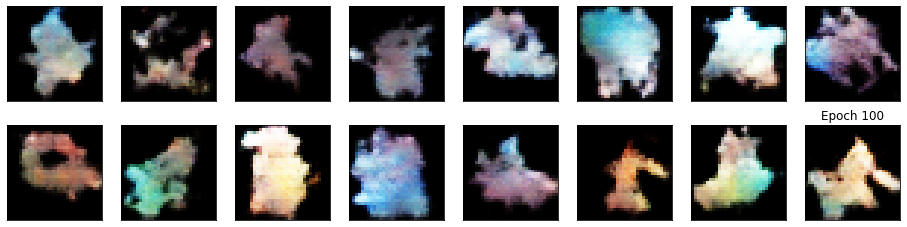

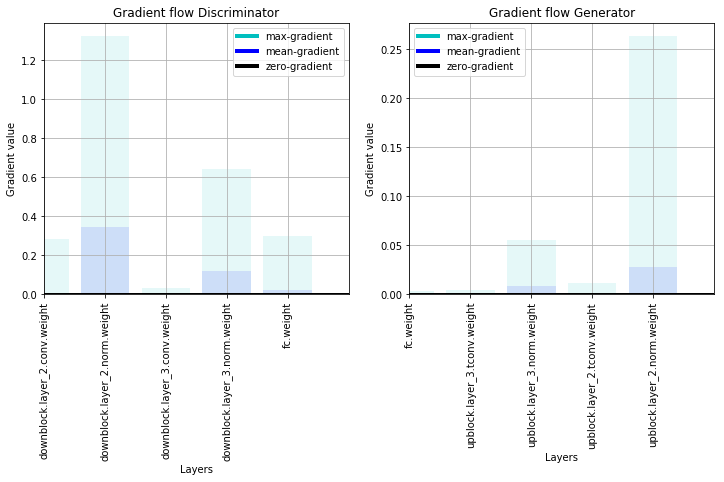

Epoch [  110/  800] | d_loss: 1.3071 | g_loss: 0.6255
Epoch [  120/  800] | d_loss: 1.3572 | g_loss: 0.6185
Epoch [  130/  800] | d_loss: 1.3276 | g_loss: 0.8812
Epoch [  140/  800] | d_loss: 1.3636 | g_loss: 0.6835
Epoch [  150/  800] | d_loss: 1.2921 | g_loss: 0.5821
Epoch [  160/  800] | d_loss: 1.2627 | g_loss: 0.6971
Epoch [  170/  800] | d_loss: 1.3300 | g_loss: 0.5477
Epoch [  180/  800] | d_loss: 1.3289 | g_loss: 0.7771
Epoch [  190/  800] | d_loss: 1.2878 | g_loss: 0.6603
Epoch [  200/  800] | d_loss: 1.3138 | g_loss: 0.7168


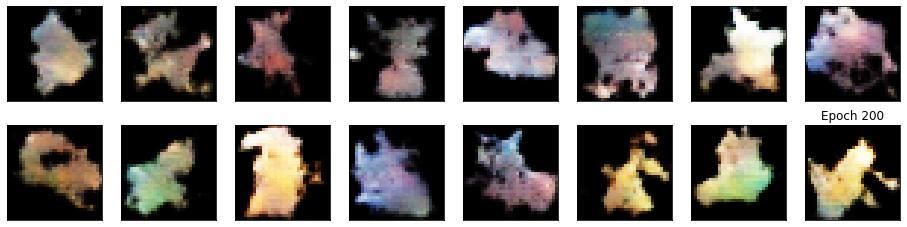

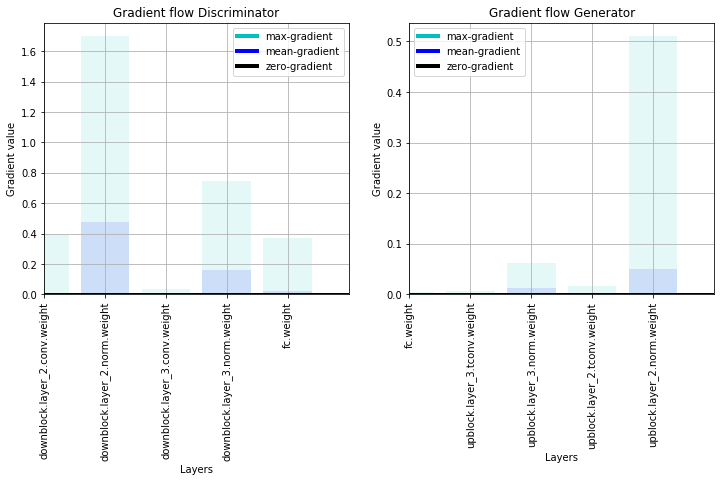

Epoch [  210/  800] | d_loss: 1.3343 | g_loss: 0.7673
Epoch [  220/  800] | d_loss: 1.3841 | g_loss: 0.6108
Epoch [  230/  800] | d_loss: 1.4220 | g_loss: 1.0613
Epoch [  240/  800] | d_loss: 1.2326 | g_loss: 0.6369
Epoch [  250/  800] | d_loss: 1.3574 | g_loss: 0.6455
Epoch [  260/  800] | d_loss: 1.3723 | g_loss: 0.6496
Epoch [  270/  800] | d_loss: 1.3643 | g_loss: 0.7068
Epoch [  280/  800] | d_loss: 1.1402 | g_loss: 0.7513
Epoch [  290/  800] | d_loss: 1.2393 | g_loss: 0.7698
Epoch [  300/  800] | d_loss: 1.1501 | g_loss: 0.7825


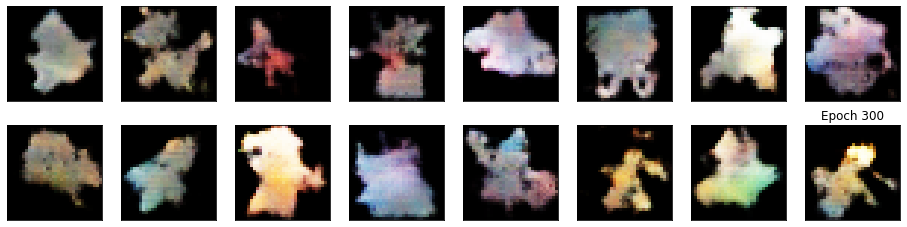

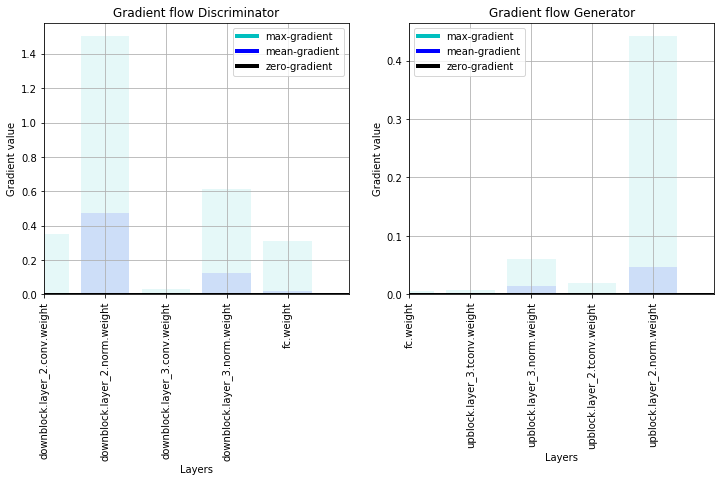

Epoch [  310/  800] | d_loss: 1.2293 | g_loss: 0.8602
Epoch [  320/  800] | d_loss: 1.2188 | g_loss: 0.8523
Epoch [  330/  800] | d_loss: 1.3479 | g_loss: 0.9658
Epoch [  340/  800] | d_loss: 1.2605 | g_loss: 0.9086
Epoch [  350/  800] | d_loss: 1.2238 | g_loss: 0.6843
Epoch [  360/  800] | d_loss: 1.5763 | g_loss: 0.6832
Epoch [  370/  800] | d_loss: 1.3152 | g_loss: 0.7626
Epoch [  380/  800] | d_loss: 1.4657 | g_loss: 0.5747
Epoch [  390/  800] | d_loss: 1.2363 | g_loss: 0.7129
Epoch [  400/  800] | d_loss: 1.2279 | g_loss: 0.6612


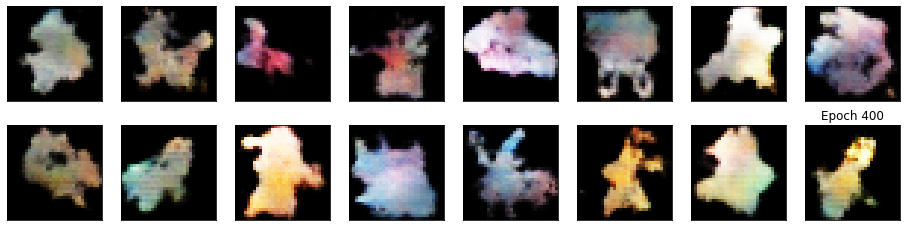

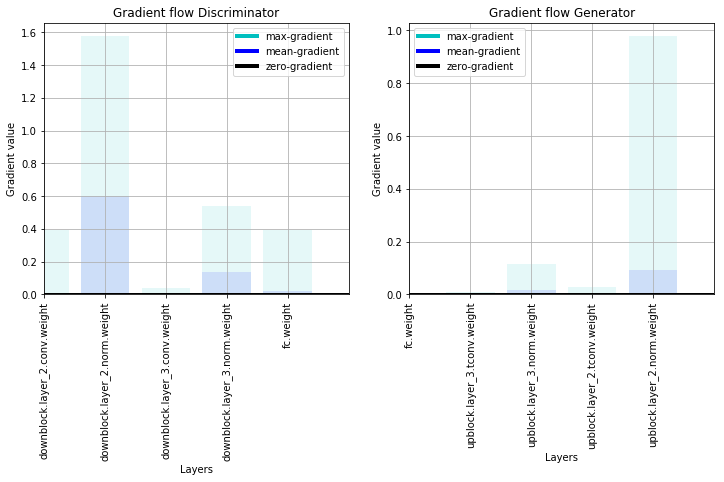

Epoch [  410/  800] | d_loss: 1.3383 | g_loss: 0.7974
Epoch [  420/  800] | d_loss: 1.4044 | g_loss: 0.8946
Epoch [  430/  800] | d_loss: 1.2684 | g_loss: 0.7352
Epoch [  440/  800] | d_loss: 1.3091 | g_loss: 0.7027
Epoch [  450/  800] | d_loss: 1.2366 | g_loss: 0.6799
Epoch [  460/  800] | d_loss: 1.2955 | g_loss: 0.6944
Epoch [  470/  800] | d_loss: 1.2514 | g_loss: 0.8830
Epoch [  480/  800] | d_loss: 1.2076 | g_loss: 0.7445
Epoch [  490/  800] | d_loss: 1.3697 | g_loss: 0.8463
Epoch [  500/  800] | d_loss: 1.2799 | g_loss: 0.6013


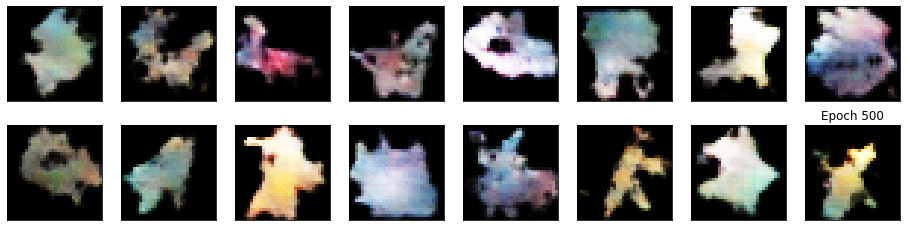

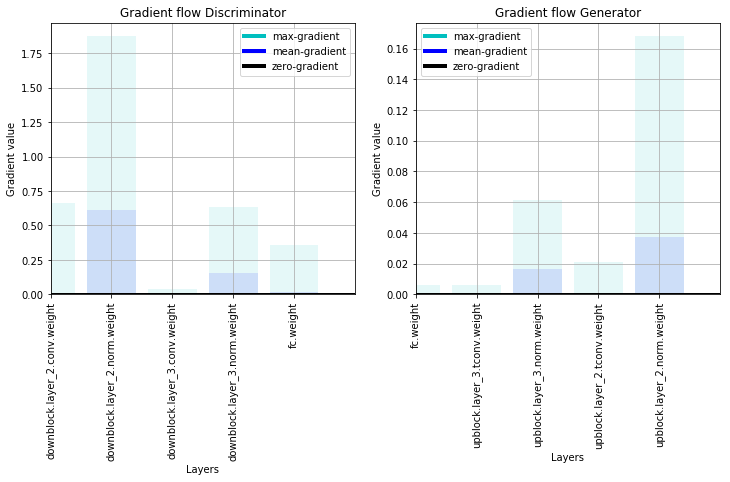

Epoch [  510/  800] | d_loss: 1.2648 | g_loss: 0.6751
Epoch [  520/  800] | d_loss: 1.1381 | g_loss: 1.0375
Epoch [  530/  800] | d_loss: 1.1944 | g_loss: 0.7238
Epoch [  540/  800] | d_loss: 1.2133 | g_loss: 0.7379
Epoch [  550/  800] | d_loss: 1.0677 | g_loss: 0.7596
Epoch [  560/  800] | d_loss: 1.2612 | g_loss: 0.9988
Epoch [  570/  800] | d_loss: 1.3237 | g_loss: 0.6727
Epoch [  580/  800] | d_loss: 1.2631 | g_loss: 0.8837
Epoch [  590/  800] | d_loss: 1.1934 | g_loss: 0.6510
Epoch [  600/  800] | d_loss: 1.2902 | g_loss: 0.6582


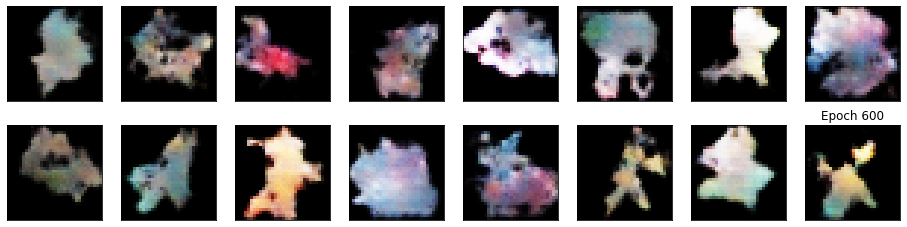

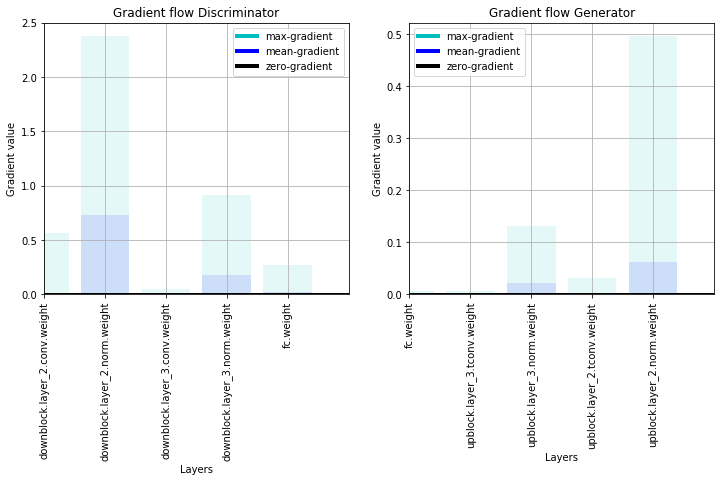

Epoch [  610/  800] | d_loss: 1.1722 | g_loss: 0.8359
Epoch [  620/  800] | d_loss: 1.1566 | g_loss: 0.7882
Epoch [  630/  800] | d_loss: 1.3072 | g_loss: 0.7634
Epoch [  640/  800] | d_loss: 1.2158 | g_loss: 0.7007
Epoch [  650/  800] | d_loss: 1.3255 | g_loss: 0.7247
Epoch [  660/  800] | d_loss: 1.2234 | g_loss: 0.9360
Epoch [  670/  800] | d_loss: 1.2295 | g_loss: 1.0458
Epoch [  680/  800] | d_loss: 1.2153 | g_loss: 0.7380
Epoch [  690/  800] | d_loss: 1.2660 | g_loss: 0.8107
Epoch [  700/  800] | d_loss: 1.3065 | g_loss: 1.0257


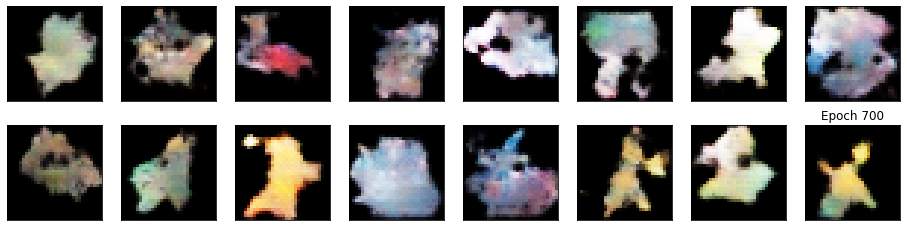

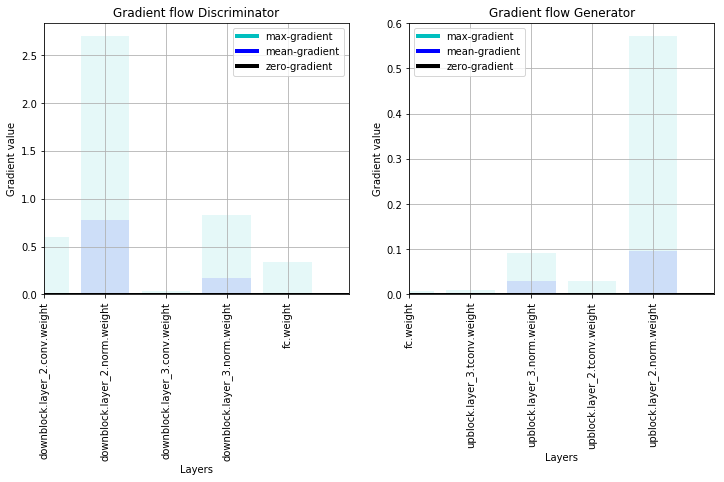

Epoch [  710/  800] | d_loss: 1.1802 | g_loss: 0.8210
Epoch [  720/  800] | d_loss: 1.2180 | g_loss: 0.8949
Epoch [  730/  800] | d_loss: 1.2534 | g_loss: 0.6630
Epoch [  740/  800] | d_loss: 1.2746 | g_loss: 0.8549
Epoch [  750/  800] | d_loss: 0.8872 | g_loss: 0.6168
Epoch [  760/  800] | d_loss: 1.3242 | g_loss: 0.6200
Epoch [  770/  800] | d_loss: 1.0511 | g_loss: 0.5490
Epoch [  780/  800] | d_loss: 1.1809 | g_loss: 0.9750
Epoch [  790/  800] | d_loss: 1.0839 | g_loss: 0.8264
Epoch [  800/  800] | d_loss: 1.1616 | g_loss: 0.7800


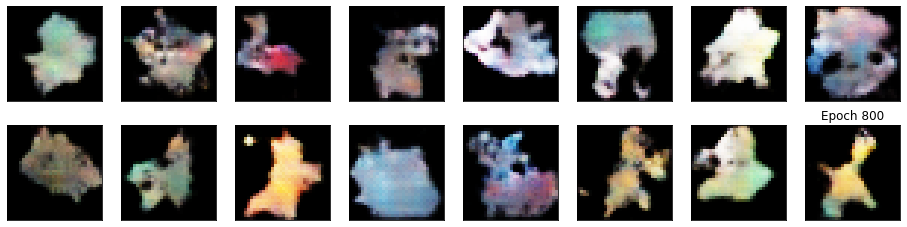

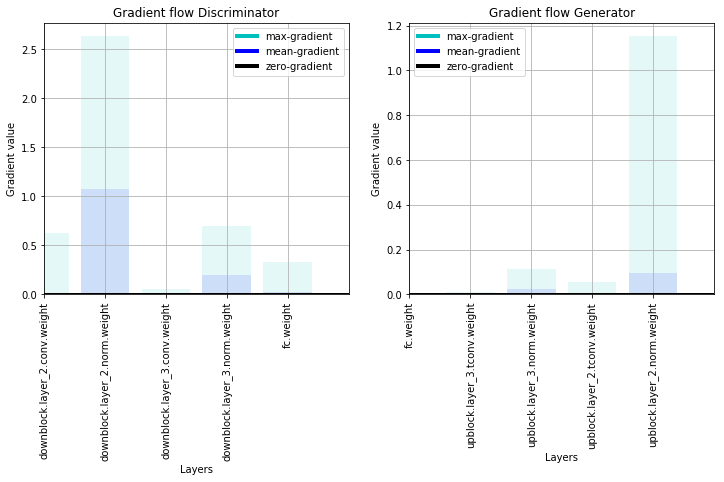

Stage 64x64 (3/3)
Cycle (1/2) - {'lr': 0.001, 'nb_epochs': 200}
Epoch [   10/  200] | d_loss: 2.3222 | g_loss: 3.4379
Epoch [   20/  200] | d_loss: 2.0976 | g_loss: 3.1690
Epoch [   30/  200] | d_loss: 1.5358 | g_loss: 2.3827
Epoch [   40/  200] | d_loss: 1.2122 | g_loss: 1.7464
Epoch [   50/  200] | d_loss: 1.0978 | g_loss: 1.8901
Epoch [   60/  200] | d_loss: 1.3971 | g_loss: 3.3821
Epoch [   70/  200] | d_loss: 1.0208 | g_loss: 2.3175
Epoch [   80/  200] | d_loss: 1.0640 | g_loss: 2.1409
Epoch [   90/  200] | d_loss: 0.4031 | g_loss: 1.4255
Epoch [  100/  200] | d_loss: 0.8132 | g_loss: 1.9418


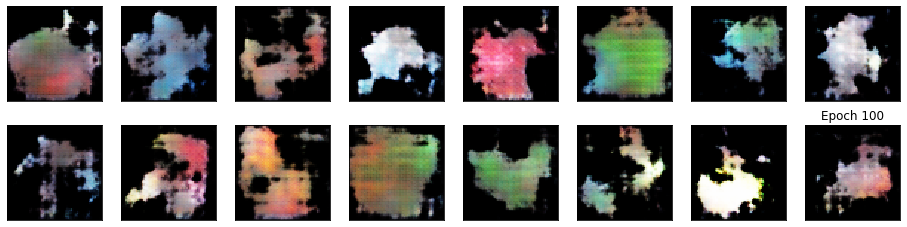

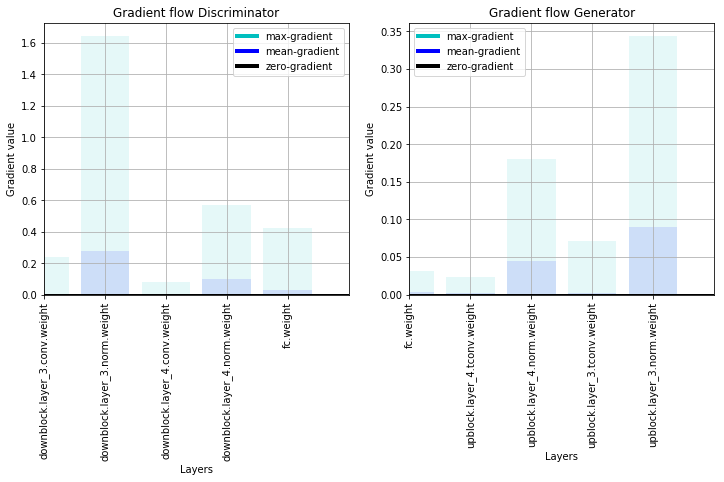

Epoch [  110/  200] | d_loss: 0.6907 | g_loss: 2.2921
Epoch [  120/  200] | d_loss: 0.9355 | g_loss: 2.1839
Epoch [  130/  200] | d_loss: 0.7772 | g_loss: 2.0891
Epoch [  140/  200] | d_loss: 0.6646 | g_loss: 1.7321
Epoch [  150/  200] | d_loss: 0.8091 | g_loss: 1.3842
Epoch [  160/  200] | d_loss: 0.8001 | g_loss: 1.8543
Epoch [  170/  200] | d_loss: 1.2954 | g_loss: 2.2994
Epoch [  180/  200] | d_loss: 0.8398 | g_loss: 1.8052
Epoch [  190/  200] | d_loss: 1.1567 | g_loss: 1.3497
Epoch [  200/  200] | d_loss: 0.5547 | g_loss: 1.7670


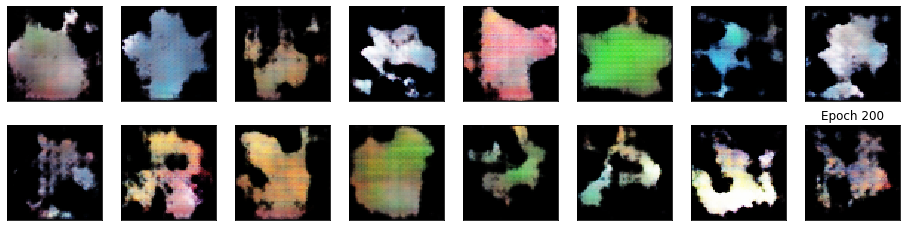

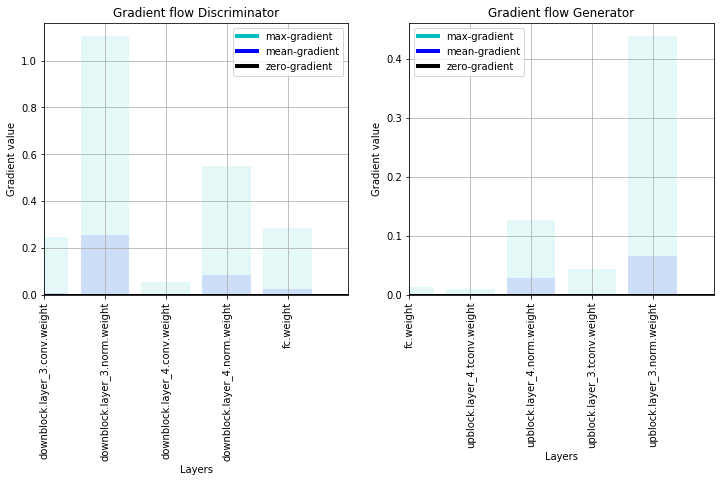

Cycle (2/2) - {'lr': 0.0005, 'nb_epochs': 800}
Epoch [   10/  800] | d_loss: 1.0620 | g_loss: 1.7570
Epoch [   20/  800] | d_loss: 0.3958 | g_loss: 2.0376
Epoch [   30/  800] | d_loss: 1.1027 | g_loss: 1.8402
Epoch [   40/  800] | d_loss: 0.6496 | g_loss: 2.3546
Epoch [   50/  800] | d_loss: 0.8920 | g_loss: 2.5735
Epoch [   60/  800] | d_loss: 0.3695 | g_loss: 1.4472
Epoch [   70/  800] | d_loss: 0.5044 | g_loss: 1.5446
Epoch [   80/  800] | d_loss: 0.8433 | g_loss: 2.4488
Epoch [   90/  800] | d_loss: 0.9232 | g_loss: 2.0291
Epoch [  100/  800] | d_loss: 0.9487 | g_loss: 2.0331


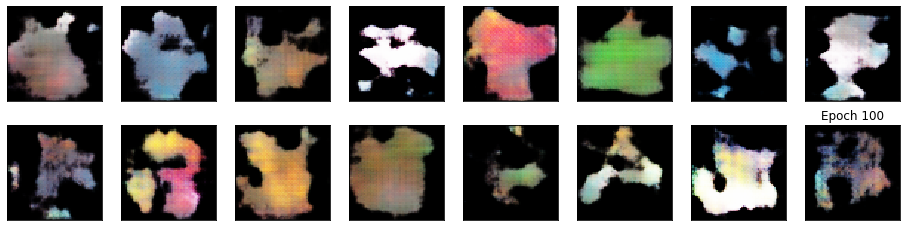

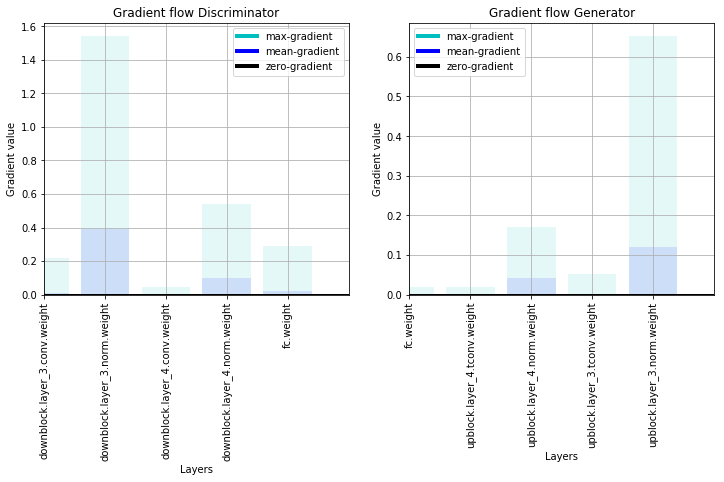

Epoch [  110/  800] | d_loss: 0.8186 | g_loss: 2.0515
Epoch [  120/  800] | d_loss: 1.2363 | g_loss: 2.1892
Epoch [  130/  800] | d_loss: 0.9079 | g_loss: 1.9620
Epoch [  140/  800] | d_loss: 0.9723 | g_loss: 2.6965
Epoch [  150/  800] | d_loss: 0.6974 | g_loss: 1.7030
Epoch [  160/  800] | d_loss: 0.9834 | g_loss: 1.3174
Epoch [  170/  800] | d_loss: 0.5079 | g_loss: 1.8628
Epoch [  180/  800] | d_loss: 0.7344 | g_loss: 1.6789
Epoch [  190/  800] | d_loss: 0.5464 | g_loss: 1.5308
Epoch [  200/  800] | d_loss: 0.9920 | g_loss: 2.1288


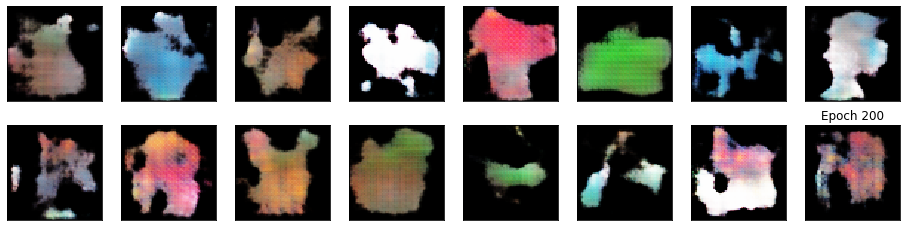

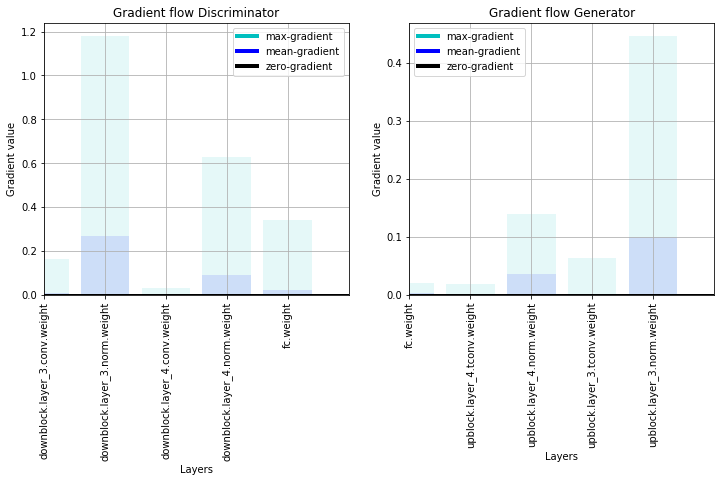

Epoch [  210/  800] | d_loss: 1.0019 | g_loss: 1.5987
Epoch [  220/  800] | d_loss: 0.5137 | g_loss: 2.9704
Epoch [  230/  800] | d_loss: 0.8413 | g_loss: 2.5365
Epoch [  240/  800] | d_loss: 0.7671 | g_loss: 1.3414
Epoch [  250/  800] | d_loss: 0.9236 | g_loss: 2.3071
Epoch [  260/  800] | d_loss: 0.9082 | g_loss: 1.6844
Epoch [  270/  800] | d_loss: 0.9724 | g_loss: 4.0264
Epoch [  280/  800] | d_loss: 0.7227 | g_loss: 2.1856
Epoch [  290/  800] | d_loss: 0.9028 | g_loss: 1.4453
Epoch [  300/  800] | d_loss: 0.8102 | g_loss: 1.1462


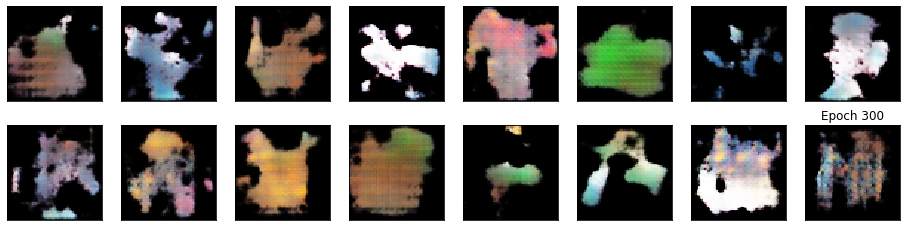

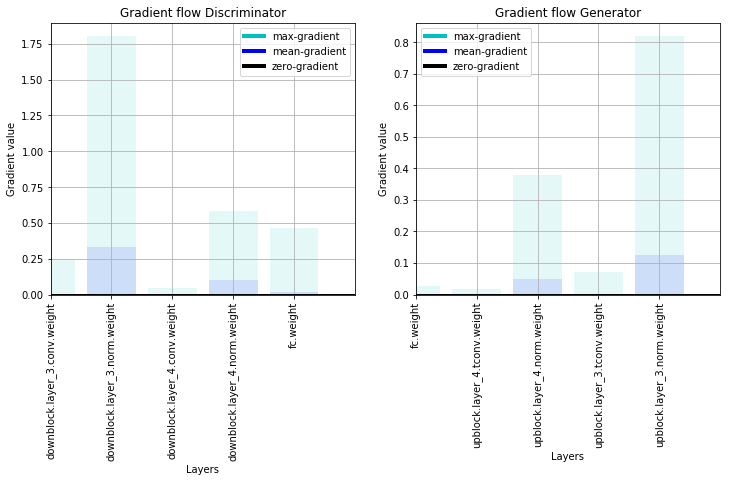

Epoch [  310/  800] | d_loss: 0.9612 | g_loss: 2.5081
Epoch [  320/  800] | d_loss: 0.3576 | g_loss: 1.0272
Epoch [  330/  800] | d_loss: 0.9878 | g_loss: 2.7484
Epoch [  340/  800] | d_loss: 0.5788 | g_loss: 1.5254
Epoch [  350/  800] | d_loss: 0.5840 | g_loss: 1.6429
Epoch [  360/  800] | d_loss: 0.7395 | g_loss: 2.3673
Epoch [  370/  800] | d_loss: 0.8824 | g_loss: 2.1065
Epoch [  380/  800] | d_loss: 0.7991 | g_loss: 1.6527
Epoch [  390/  800] | d_loss: 0.7018 | g_loss: 1.7896
Epoch [  400/  800] | d_loss: 0.5915 | g_loss: 1.6220


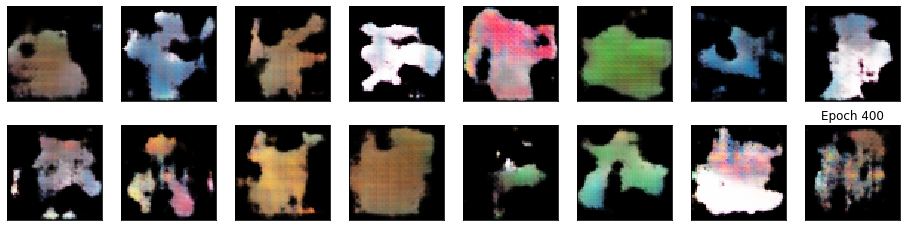

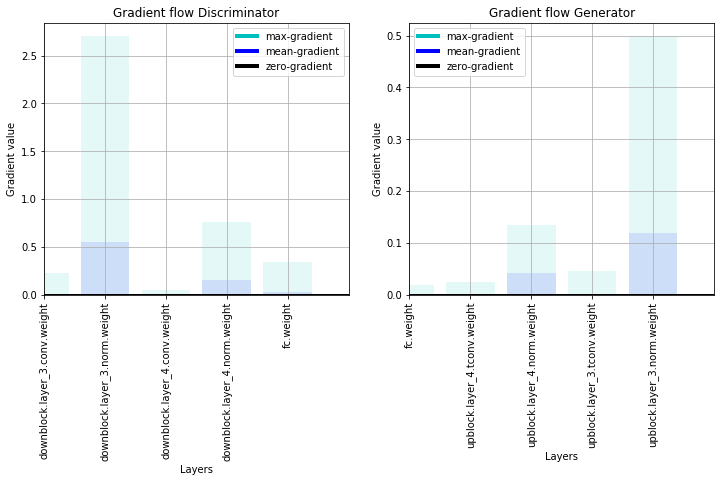

Epoch [  410/  800] | d_loss: 1.0945 | g_loss: 1.4444
Epoch [  420/  800] | d_loss: 0.8931 | g_loss: 1.8481
Epoch [  430/  800] | d_loss: 0.4648 | g_loss: 1.6558
Epoch [  440/  800] | d_loss: 0.3605 | g_loss: 2.7445
Epoch [  450/  800] | d_loss: 1.0217 | g_loss: 2.4559
Epoch [  460/  800] | d_loss: 0.8180 | g_loss: 1.9162
Epoch [  470/  800] | d_loss: 0.9254 | g_loss: 2.1318
Epoch [  480/  800] | d_loss: 0.8358 | g_loss: 1.6175
Epoch [  490/  800] | d_loss: 0.7923 | g_loss: 2.0997
Epoch [  500/  800] | d_loss: 0.5193 | g_loss: 1.8055


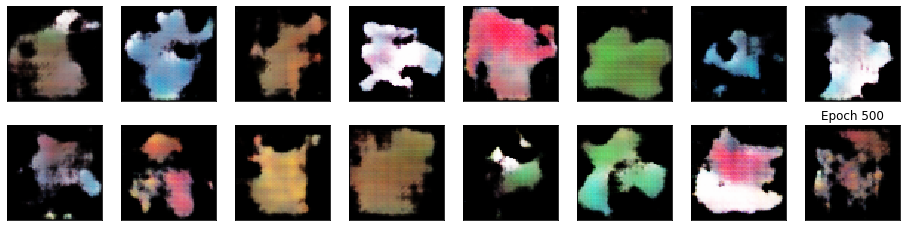

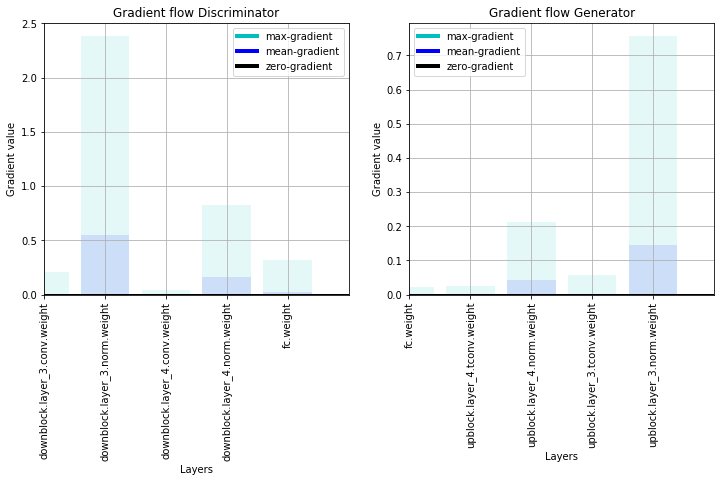

Epoch [  510/  800] | d_loss: 0.7231 | g_loss: 2.7859
Epoch [  520/  800] | d_loss: 0.8716 | g_loss: 1.1753
Epoch [  530/  800] | d_loss: 1.1424 | g_loss: 0.7505
Epoch [  540/  800] | d_loss: 0.6803 | g_loss: 1.8192
Epoch [  550/  800] | d_loss: 0.6921 | g_loss: 1.3424
Epoch [  560/  800] | d_loss: 0.7525 | g_loss: 1.7920
Epoch [  570/  800] | d_loss: 0.4061 | g_loss: 2.4848
Epoch [  580/  800] | d_loss: 0.6251 | g_loss: 1.5924
Epoch [  590/  800] | d_loss: 0.8423 | g_loss: 2.5078
Epoch [  600/  800] | d_loss: 0.3138 | g_loss: 2.7427


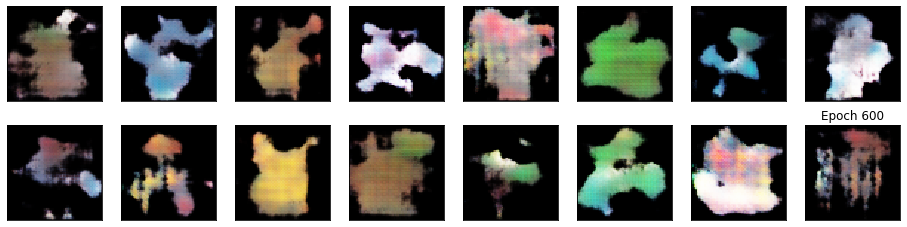

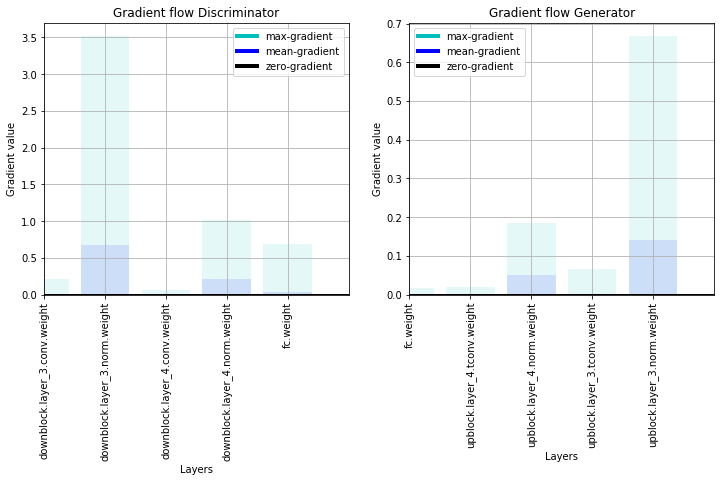

Epoch [  610/  800] | d_loss: 0.4783 | g_loss: 1.8313
Epoch [  620/  800] | d_loss: 0.6249 | g_loss: 2.5049
Epoch [  630/  800] | d_loss: 0.4462 | g_loss: 1.5047
Epoch [  640/  800] | d_loss: 1.0601 | g_loss: 2.8439
Epoch [  650/  800] | d_loss: 0.8371 | g_loss: 2.3846
Epoch [  660/  800] | d_loss: 0.7717 | g_loss: 1.5910
Epoch [  670/  800] | d_loss: 0.3439 | g_loss: 0.8779
Epoch [  680/  800] | d_loss: 0.2484 | g_loss: 1.8472
Epoch [  690/  800] | d_loss: 0.7398 | g_loss: 2.1458
Epoch [  700/  800] | d_loss: 0.6436 | g_loss: 1.6598


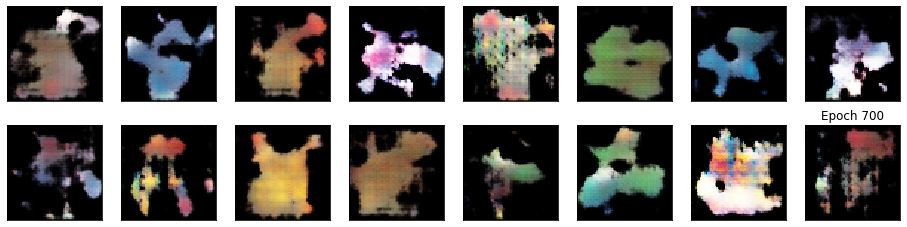

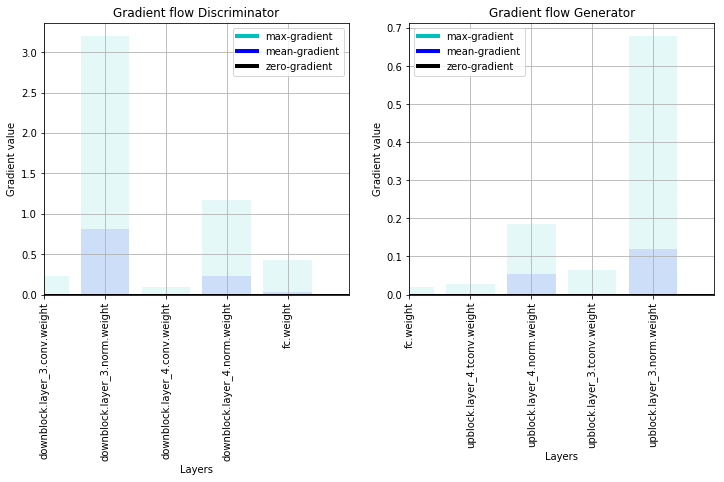

Epoch [  710/  800] | d_loss: 0.4719 | g_loss: 2.0135
Epoch [  720/  800] | d_loss: 0.3990 | g_loss: 1.6604
Epoch [  730/  800] | d_loss: 0.8943 | g_loss: 2.4989
Epoch [  740/  800] | d_loss: 1.0477 | g_loss: 0.9483
Epoch [  750/  800] | d_loss: 0.9169 | g_loss: 2.5519
Epoch [  760/  800] | d_loss: 0.5168 | g_loss: 3.1451
Epoch [  770/  800] | d_loss: 0.8384 | g_loss: 1.6303
Epoch [  780/  800] | d_loss: 0.7823 | g_loss: 1.8594
Epoch [  790/  800] | d_loss: 0.6684 | g_loss: 2.3002
Epoch [  800/  800] | d_loss: 0.7172 | g_loss: 1.9496


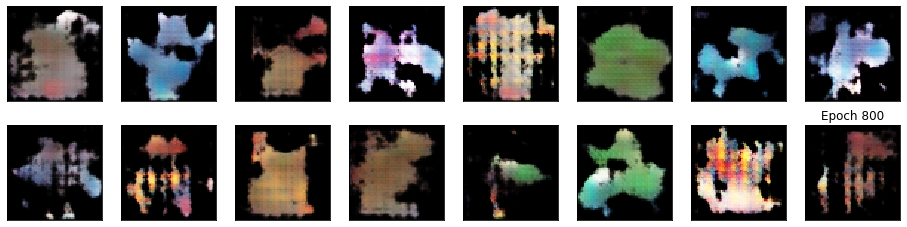

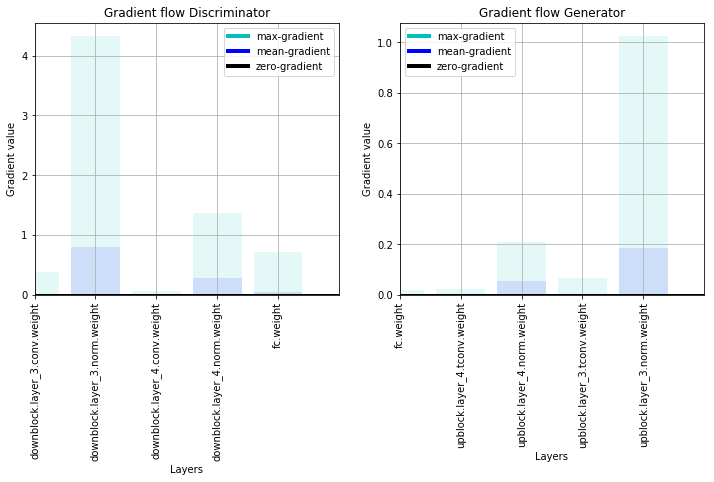

In [15]:
tot_epochs = 0
for stage_idx in range(nb_stages):
    poke_loader = get_dataloader(batch_size, img_size, data_dir='data')

    # Check number of sampling operations
    d_depth = int(np.log2(img_size / latent_feature_size))
    g_depth = d_depth + int(np.log2(d_conv_dim / g_conv_dim))
    # Recreate the nets
    d_channels = [3] + [2 ** idx * d_conv_dim for idx in range(d_depth)]
    D = Discriminator(d_channels, img_size, d_ksize, d_stride,
                      normalization_block=norm_block, use_dropout=use_dropout,
                      init_weights=normal_initialization)

    g_channels = [2 ** (g_depth - 1 - idx) * g_conv_dim for idx in range(g_depth)] + [3]
    G = Generator(z_size, g_channels, img_size, g_ksize, g_stride,
                  normalization_block=norm_block, use_dropout=use_dropout,
                  init_weights=normal_initialization)
    # Parameter loading & freezing
    if stage_idx > 0:
        # Load stage parameters & freeze previously trained layers
        D.load_state_dict(d_state_dict, strict=False)
        D.freeze_layers(d_depth - 1)
        
        G.load_state_dict(g_state_dict, strict=False)
        G.freeze_layers(g_depth - 1)

    # Move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()
                
    # Train the stage
    print(f"======================\nStage {img_size}x{img_size} ({stage_idx+1}/{nb_stages})\n======================")
    for cycle_idx, cycle_settings in enumerate(cycles):
        print(f"Cycle ({cycle_idx+1}/{len(cycles)}) - {cycle_settings}")
        d_optimizer = optim.Adam(D.parameters(), cycle_settings.get('lr'), [beta1, beta2])
        g_optimizer = optim.Adam(G.parameters(), cycle_settings.get('lr'), [beta1, beta2])
        train_GAN(D, d_optimizer, G, g_optimizer, poke_loader, fixed_z,
                  criterion, cycle_settings.get('nb_epochs'), train_on_gpu,
                  logger, log_every=10, sample_print_freq=100, starting_epoch=tot_epochs)
        tot_epochs += cycle_settings.get('nb_epochs')
        # Model state saving (keep only sampling layers)
        d_state_dict = {p_name: p for p_name, p in D.state_dict().items()
                        if p_name.split('.')[0].split('_')[0] == 'downblock'}
        g_state_dict = {p_name: p for p_name, p in G.state_dict().items()
                        if p_name.split('.')[0].split('_')[0] == 'upblock'}   


    img_size *= 2

logger.close()

In [16]:
logger.close()